[View in Colaboratory](https://colab.research.google.com/github/jgrandinetti/AI/blob/master/SBRT.ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.backends.backend_pdf as plt_pdf
import pandas as pd
import os
from tensorflow import keras as k
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip install xlrd

In [0]:
model = k.models.Sequential()
model.add(k.layers.Dense(64, activation='relu', input_shape=(15,)))
model.add(k.layers.Dense(32, activation='relu'))
model.add(k.layers.Dense(8, activation='relu'))
model.add(k.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=k.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# Keras NN Model

df = pd.read_excel('drive/My Drive/Colab_Notebooks/Lung-SBRT-Data.xlsx')
df = df.values

#np.random.seed(12)

acc = []
loss = []

its = 100
size = 81

for it in range(its):  
  
  testing_split = np.random.uniform(0.05, 0.4)

  training_size = int(size*(1-testing_split))
  testing_size = int(size*testing_split)

  total=training_size + testing_size
  if total < size:
    training_size += 1
  elif total > size:
    training_size -= 1

  # Training
  tumor_outcome_tr = [] # column 18
  tumor_size_tr = [] # 5
  hist_tr = []
  loc_tr = []
  stage_tr = []
  dose_tr = []
  frac_tr = []
  dose_per_frac_tr = []
  central_tr = [] # 4
  anti_inf_tr = [] # 12
  anti_dia_tr = [] # 13
  met_tr = [] # 14
  stat_tr = [] # 15
  ACE_tr = [] # 16
  ASA_tr = [] # 17



  # Testing
  tumor_outcome_te = [] # column 18
  tumor_size_te = []
  hist_te = []
  loc_te = []
  stage_te = []
  dose_te = []
  frac_te = []
  dose_per_frac_te = []
  central_te = [] # 4
  anti_inf_te = [] # 12
  anti_dia_te = [] # 13
  met_te = [] # 14
  stat_te = [] # 15
  ACE_te = [] # 16
  ASA_te = [] # 17


  var_len = training_size + testing_size
  arr = np.arange(var_len)
  np.random.shuffle(arr)

  for yy in range(0,training_size):
      x = arr[yy]
      tumor_outcome_tr.append(df[x][18])
      tumor_size_tr.append(df[x][5])
      hist_tr.append(df[x][6])
      loc_tr.append(df[x][7])
      stage_tr.append(df[x][8])
      dose_tr.append(df[x][9])
      frac_tr.append(df[x][10])
      dose_per_frac_tr.append(df[x][11])
      central_tr.append(df[x][4])
      anti_inf_tr.append(df[x][12])
      anti_dia_tr.append(df[x][13])
      met_tr.append(df[x][14])
      stat_tr.append(df[x][15])
      ACE_tr.append(df[x][16])
      ASA_tr.append(df[x][17])

  for xx in range(training_size, var_len):
      y = arr[xx]
      tumor_outcome_te.append(df[y][18])
      tumor_size_te.append(df[y][5])
      hist_te.append(df[y][6])
      loc_te.append(df[y][7])
      stage_te.append(df[y][8])
      dose_te.append(df[y][9])
      frac_te.append(df[y][10])
      dose_per_frac_te.append(df[y][11])
      central_te.append(df[x][4])
      anti_inf_te.append(df[x][12])
      anti_dia_te.append(df[x][13])
      met_te.append(df[x][14])
      stat_te.append(df[x][15])
      ACE_te.append(df[x][16])
      ASA_te.append(df[x][17])

  X_train = np.stack((np.array(tumor_size_tr), 
                      np.array(hist_tr), 
                      np.array(loc_tr), 
                      np.array(stage_tr), 
                      np.array(dose_tr), 
                      np.array(frac_tr), 
                      np.array(dose_per_frac_tr), 
                      np.array(central_tr), 
                      np.array(anti_inf_tr), 
                      np.array(anti_dia_tr), 
                      np.array(met_tr), 
                      np.array(stat_tr), 
                      np.array(ACE_tr), 
                      np.array(ACE_tr), 
                      np.array(ASA_tr)))
  X_train = X_train.T 
  Y_train = np.array(tumor_outcome_tr)


  X_test = np.stack((np.array(tumor_size_te), 
                     np.array(hist_te), 
                     np.array(loc_te), 
                     np.array(stage_te), 
                     np.array(dose_te), 
                     np.array(frac_te), 
                     np.array(dose_per_frac_te), 
                     np.array(central_te), 
                     np.array(anti_inf_te), 
                     np.array(anti_dia_te), 
                     np.array(met_te), 
                     np.array(stat_te), 
                     np.array(ACE_te), 
                     np.array(ACE_te), 
                     np.array(ASA_te)))
  X_test = X_test.T
  Y_test = np.array(tumor_outcome_te)

  # Fit Model

  history = model.fit(X_train, Y_train ,epochs=25, batch_size=5, verbose = 0)
  results = model.evaluate(X_test, Y_test, verbose = 0)
  acc.append(results[1])
  loss.append(results[0])
  

In [5]:
print("Results for %0.0f random groupings of data" %its)
print("-----------------------")
acc = np.array(acc)
print("Accuracy:",np.average(acc)*100,"%")

loss = np.array(loss)
print("Loss:",np.average(loss))

# print("-----------------------")
# print()
# print(acc)
# print()
# print(loss)

Results for 100 random groupings of data
-----------------------
Accuracy: 70.30560567975044 %
Loss: 2.2476473706099056


-----------------------
KNN for 3 nearest points
-----------------------
3 Dimensions


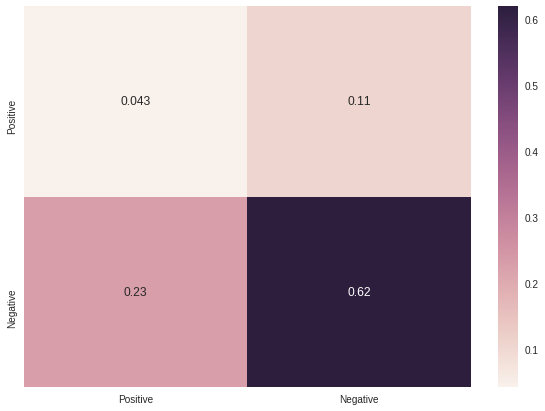


average accuracy: 66.25 %

average precision: 28.59960552268244 %

5 Dimensions


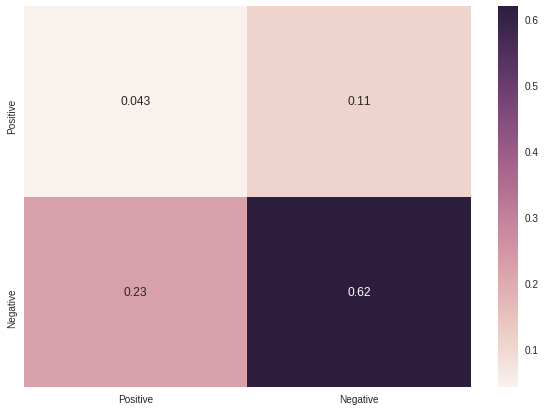


average accuracy: 66.3 %

average precision: 27.90322580645161 %



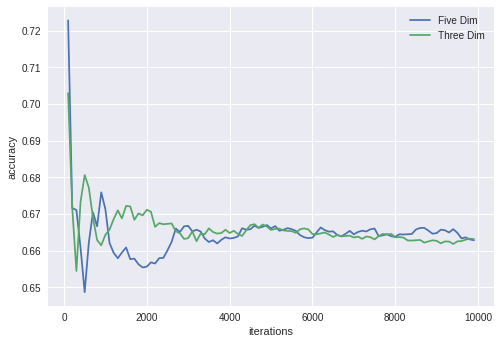

-----------------------
KNN for 5 nearest points
-----------------------
3 Dimensions


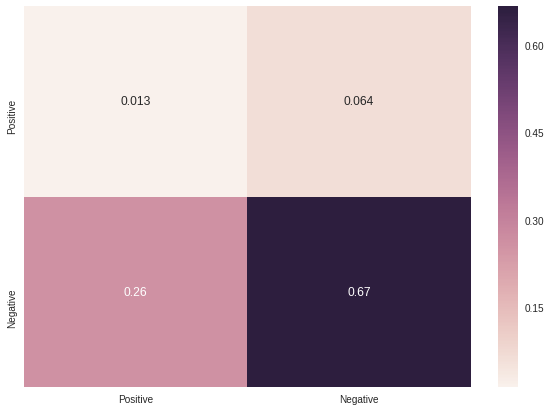


average accuracy: 67.94 %

average precision: 16.883116883116884 %

5 Dimensions


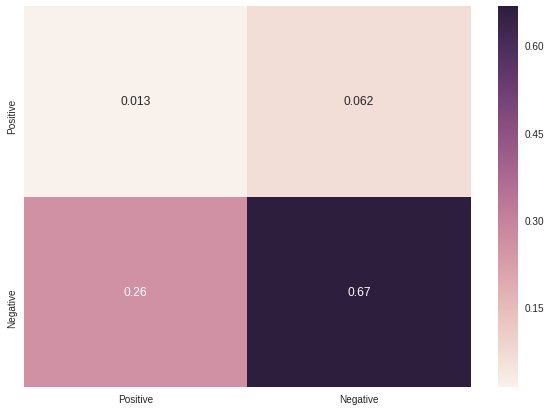


average accuracy: 68.16 %

average precision: 17.503302509907527 %



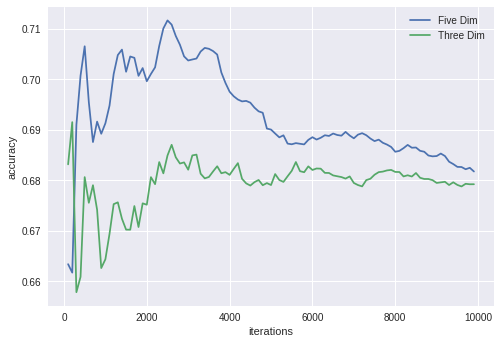

In [22]:
# KNN Model

its1 = 10000
its2 = 10000
size = 81
#num_points = 5

for num_points in range(3,6,2): # Will run for 3 closest points and then again for 5
  
  print('-----------------------')
  print('KNN for', num_points, 'nearest points')
  print('-----------------------')

  acc1 = []
  its_count1 = []
  running_avg1 = []

  true_p = []
  true_n = []
  false_p = []
  false_n = []

  # np.random.seed(42)

  print('3 Dimensions')

  for it in (range(its2)):

      testing_split = np.random.uniform(0.1, 0.25)

      training_size = int(size*(1-testing_split))
      testing_size = int(size*testing_split)

      total=training_size + testing_size
      if total < size:
          training_size += 1
      elif total > size:
          training_size -= 1

      # Training
      tumor_outcome_tr = [] # column 18
      tumor_size_tr = [] # 5
      hist_tr = []
      loc_tr = []
      stage_tr = []
      dose_tr = []
      frac_tr = []
      dose_per_frac_tr = []
      central_tr = [] # 4
      anti_inf_tr = [] # 12
      anti_dia_tr = [] # 13
      met_tr = [] # 14
      stat_tr = [] # 15
      ACE_tr = [] # 16
      ASA_tr = [] # 17



      # Testing
      tumor_outcome_te = [] # column 18
      tumor_size_te = []
      hist_te = []
      loc_te = []
      stage_te = []
      dose_te = []
      frac_te = []
      dose_per_frac_te = []
      central_te = [] # 4
      anti_inf_te = [] # 12
      anti_dia_te = [] # 13
      met_te = [] # 14
      stat_te = [] # 15
      ACE_te = [] # 16
      ASA_te = [] # 17


      var_len = training_size + testing_size
      arr = np.arange(var_len)
      np.random.shuffle(arr)

      for yy in range(0,training_size):
          x = arr[yy]
          tumor_outcome_tr.append(df[x][18])
          tumor_size_tr.append(df[x][5])
          hist_tr.append(df[x][6])
          # loc_tr.append(df[x][7])
          stage_tr.append(df[x][8])
          dose_tr.append(df[x][9])
          # frac_tr.append(df[x][10])
          # dose_per_frac_tr.append(df[x][11])
          # central_tr.append(df[x][4])
          anti_inf_tr.append(df[x][12])
          anti_dia_tr.append(df[x][13])
          # met_tr.append(df[x][14])
          # stat_tr.append(df[x][15])
          # ACE_tr.append(df[x][16])
          # ASA_tr.append(df[x][17])

      for xx in range(training_size, var_len):
          y = arr[xx]
          tumor_outcome_te.append(df[y][18])
          tumor_size_te.append(df[y][5])
          hist_te.append(df[y][6])
          # loc_te.append(df[y][7])
          stage_te.append(df[y][8])
          dose_te.append(df[y][9])
          # frac_te.append(df[y][10])
          # dose_per_frac_te.append(df[y][11])
          # central_te.append(df[x][4])
          anti_inf_te.append(df[x][12])
          anti_dia_te.append(df[x][13])
          # met_te.append(df[x][14])
          # stat_te.append(df[x][15])
          # ACE_te.append(df[x][16])
          # ASA_te.append(df[x][17])

      for z in range(testing_size): #testing size
          distance = [] # euclidean norm of the distance between testing and training

          # confusion matrix
          tp = 0
          fp = 0
          tn = 0
          fn = 0

          corr_guess = []
          incorr_guess = []
          fail = []
          no_fail = []
          for zz in range(training_size):
              dim1 = (hist_te[z] - hist_tr[zz])**2
              dim2 = (stage_te[z] - stage_tr[zz])**2
              dim3 = (dose_te[z] - dose_tr[zz])**2
              dim4 = (tumor_size_te[z] - tumor_size_tr[zz])**2
              # dim5 = (anti_inf_te[z] - anti_inf_tr[zz])**2
              # dim6 = (anti_dia_te[z] - anti_dia_tr[zz])**2
              euc_norm = np.sqrt(dim1 + dim2 + dim3 + dim4)
              distance.append(euc_norm)

          order = np.argsort(distance)

          for t in range(num_points):
              if tumor_outcome_tr[order[t]] == 1: # tumor present
                  fail.append(1)
              elif tumor_outcome_tr[order[t]] == 0: # no tumor
                  no_fail.append(1)

          if len(fail) < len(no_fail):
              guess = 'No Tumor'
          else:
              guess = 'Tumor'

          if tumor_outcome_te[z] == 1 and guess == 'Tumor':
              tp += 1
          elif tumor_outcome_te[z] == 1 and guess == 'No Tumor':
              fn += 1
          elif tumor_outcome_te[z] == 0 and guess == 'No Tumor':
              tn += 1
          elif tumor_outcome_te[z] == 0 and guess == 'Tumor':
              fp += 1

      true_p.append(tp)
      false_n.append((fn))
      true_n.append((tn))
      false_p.append((fp))
      total = (tp) + (fn) + (tn) + (fp)

      accuracy = (((tp) + (tn)) / total)
      miss = (((fn) + (fp))/total)
      #precision = ((tp) / ((fp) + (tp)))

      acc1.append(accuracy)
      if it % 100 == 0:
        running_avg1.append(np.average(acc1))
        its_count1.append(it)

  true_positive = np.average(true_p)
  false_negative = np.average(false_n)
  true_negative = np.average(true_n)
  false_positive = np.average(false_p)

  conf_array = [[true_positive, false_positive],[false_negative, true_negative]]
  df_cm = pd.DataFrame(conf_array, index = ['Positive', 'Negative'], columns = ['Positive','Negative'])
  plt.figure(1, figsize = (10,7))
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  sns.heatmap(df_cm, annot=True)
  plt.show()

  prec1 = np.average(true_positive / (false_positive + true_positive))
  prec1 *= 100

  acc1 = np.average(acc1)
  acc1 = acc1 * 100
  print()
  print("average accuracy:", acc1, "%")
  print()
  print('average precision:', prec1, '%')
  print()
  del its_count1[0]
  del running_avg1[0]

  # ---------------------------------------------------------------------------- #
  acc2 = []
  its_count2 = []
  running_avg2 = []

  print('5 Dimensions')

  for it in (range(its2)):

      testing_split = np.random.uniform(0.1, 0.15)

      training_size = int(size*(1-testing_split))
      testing_size = int(size*testing_split)

      total=training_size + testing_size
      if total < size:
          training_size += 1
      elif total > size:
          training_size -= 1

      # Training
      tumor_outcome_tr = [] # column 18
      tumor_size_tr = [] # 5
      hist_tr = []
      loc_tr = []
      stage_tr = []
      dose_tr = []
      frac_tr = []
      dose_per_frac_tr = []
      central_tr = [] # 4
      anti_inf_tr = [] # 12
      anti_dia_tr = [] # 13
      met_tr = [] # 14
      stat_tr = [] # 15
      ACE_tr = [] # 16
      ASA_tr = [] # 17



      # Testing
      tumor_outcome_te = [] # column 18
      tumor_size_te = []
      hist_te = []
      loc_te = []
      stage_te = []
      dose_te = []
      frac_te = []
      dose_per_frac_te = []
      central_te = [] # 4
      anti_inf_te = [] # 12
      anti_dia_te = [] # 13
      met_te = [] # 14
      stat_te = [] # 15
      ACE_te = [] # 16
      ASA_te = [] # 17


      var_len = training_size + testing_size
      arr = np.arange(var_len)
      np.random.shuffle(arr)

      for yy in range(0,training_size):
          x = arr[yy]
          tumor_outcome_tr.append(df[x][18])
          tumor_size_tr.append(df[x][5])
          hist_tr.append(df[x][6])
          # loc_tr.append(df[x][7])
          stage_tr.append(df[x][8])
          dose_tr.append(df[x][9])
          # frac_tr.append(df[x][10])
          # dose_per_frac_tr.append(df[x][11])
          # central_tr.append(df[x][4])
          anti_inf_tr.append(df[x][12])
          anti_dia_tr.append(df[x][13])
          # met_tr.append(df[x][14])
          # stat_tr.append(df[x][15])
          # ACE_tr.append(df[x][16])
          # ASA_tr.append(df[x][17])

      for xx in range(training_size, var_len):
          y = arr[xx]
          tumor_outcome_te.append(df[y][18])
          tumor_size_te.append(df[y][5])
          hist_te.append(df[y][6])
          # loc_te.append(df[y][7])
          stage_te.append(df[y][8])
          dose_te.append(df[y][9])
          # frac_te.append(df[y][10])
          # dose_per_frac_te.append(df[y][11])
          # central_te.append(df[x][4])
          anti_inf_te.append(df[x][12])
          anti_dia_te.append(df[x][13])
          # met_te.append(df[x][14])
          # stat_te.append(df[x][15])
          # ACE_te.append(df[x][16])
          # ASA_te.append(df[x][17])

      for z in range(testing_size): #testing size
          distance = [] # euclidean norm of the distance between testing and training
          corr_guess = []
          incorr_guess = []
          fail = []
          no_fail = []

                  # confusion matrix
          tp = 0
          fp = 0
          tn = 0
          fn = 0

          for zz in range(training_size):
              dim1 = (hist_te[z] - hist_tr[zz])**2
              dim2 = (stage_te[z] - stage_tr[zz])**2
              dim3 = (dose_te[z] - dose_tr[zz])**2
              dim4 = (tumor_size_te[z] - tumor_size_tr[zz])**2
              dim5 = (anti_inf_te[z] - anti_inf_tr[zz])**2
              dim6 = (anti_dia_te[z] - anti_dia_tr[zz])**2
              euc_norm = np.sqrt(dim1 + dim2 + dim3 + dim4)
              distance.append(euc_norm)

          order = np.argsort(distance)

          for t in range(num_points):
              if tumor_outcome_tr[order[t]] == 1: # tumor present
                  fail.append(1)
              elif tumor_outcome_tr[order[t]] == 0: # no tumor
                  no_fail.append(1)

          if len(fail) < len(no_fail):
              guess = 'No Tumor'
          else:
              guess = 'Tumor'

          if tumor_outcome_te[z] == 1 and guess == 'Tumor':
              tp += 1
          elif tumor_outcome_te[z] == 1 and guess == 'No Tumor':
              fn += 1
          elif tumor_outcome_te[z] == 0 and guess == 'No Tumor':
              tn += 1
          elif tumor_outcome_te[z] == 0 and guess == 'Tumor':
              fp += 1

      true_p.append(tp)
      false_n.append((fn))
      true_n.append((tn))
      false_p.append((fp))
      total = (tp) + (fn) + (tn) + (fp)

      accuracy = (((tp) + (tn)) / total)
      miss = (((fn) + (fp))/total)

      acc2.append(accuracy)
      if it % 100 == 0:
        running_avg2.append(np.average(acc2))
        its_count2.append(it)

  true_positive = np.average(true_p)
  false_negative = np.average(false_n)
  true_negative = np.average(true_n)
  false_positive = np.average(false_p)

  conf_array = [[true_positive, false_positive],[false_negative, true_negative]]
  df_cm = pd.DataFrame(conf_array, index = ['Positive', 'Negative'], columns = ['Positive','Negative'])
  plt.figure(1, figsize = (10,7))
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  sns.heatmap(df_cm, annot=True)
  plt.show()

  prec2 = np.average(true_positive / (false_positive + true_positive))
  prec2 *= 100

  acc2 = np.average(acc2)
  acc2 = acc2 * 100
  print()
  print("average accuracy:", acc2, "%")
  print()
  print('average precision:', prec2, '%')
  print()

  del its_count2[0]
  del running_avg2[0]
  plt.plot(its_count2, running_avg2, label='Five Dim')
  plt.plot(its_count1, running_avg1, label='Three Dim')
  plt.xlabel('iterations')
  plt.ylabel('accuracy')
  plt.legend(loc='best')
  plt.show()